#EDA 1 Assignment

##Assignment Questions

In [2]:
#Q1) What is the range of selling prices in the dataset?
import pandas as pd

df = pd.read_csv('/content/BIKE DETAILS.csv')
price_range = df['selling_price'].max() - df['selling_price'].min()
print(f"The range of selling prices is {price_range} INR.")

The range of selling prices is 755000 INR.


In [3]:
#Q2) What is the median selling price for bikes in the dataset?
median_price = df['selling_price'].median()
print(f"The median selling price is {median_price} INR.")

The median selling price is 45000.0 INR.


In [4]:
#Q3) What is the most common seller type?
common_seller = df['seller_type'].mode()[0]
print(f"The most common seller type is {common_seller}.")

The most common seller type is Individual.


In [5]:
#Q4) How many bikes have driven more than 50,000 kilometers?
high_mileage_bikes = df[df['km_driven'] > 50000].shape[0]
print(f"There are {high_mileage_bikes} bikes that have driven more than 50,000 kilometers.")

There are 170 bikes that have driven more than 50,000 kilometers.


In [6]:
#Q5) What is the average km_driven value for each ownership type?
avg_km_by_owner = df.groupby('owner')['km_driven'].mean()
print(avg_km_by_owner)

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [7]:
#Q6)  What proportion of bikes are from the year 2015 or older?
total_bikes = df.shape[0]
bikes_2015_or_older = df[df['year'] <= 2015].shape[0]
proportion = bikes_2015_or_older / total_bikes
print(f"{proportion:.2%} of bikes are from the year 2015 or older.")

56.64% of bikes are from the year 2015 or older.


In [8]:
#Q7) What is the trend of missing values across the dataset?
missing_values = df.isnull().sum()
print(missing_values)

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


In [9]:
#Q8) What is the highest ex_showroom_price recorded, and for which bike?
max_price_row = df.loc[df['ex_showroom_price'].idxmax()]
print(f"The highest ex-showroom price is {max_price_row['ex_showroom_price']} INR for the bike {max_price_row['name']}.")

The highest ex-showroom price is 1278000.0 INR for the bike Harley-Davidson Street Bob.


In [10]:
#Q9) What is the total number of bikes listed by each seller type?
seller_counts = df['seller_type'].value_counts()
print(seller_counts)

seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


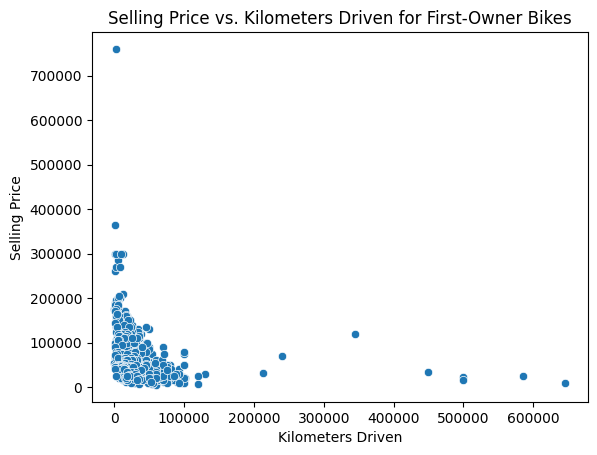

In [11]:
#Q10) What is the relationship between selling_price and km_driven for first-owner bikes?
import seaborn as sns
import matplotlib.pyplot as plt

first_owner_bikes = df[df['owner'] == '1st owner']
sns.scatterplot(x='km_driven', y='selling_price', data=first_owner_bikes)
plt.title('Selling Price vs. Kilometers Driven for First-Owner Bikes')
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price')
plt.show()

In [12]:
#Q11) Identify and remove outliers in the km_driven column using the IQR method.
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

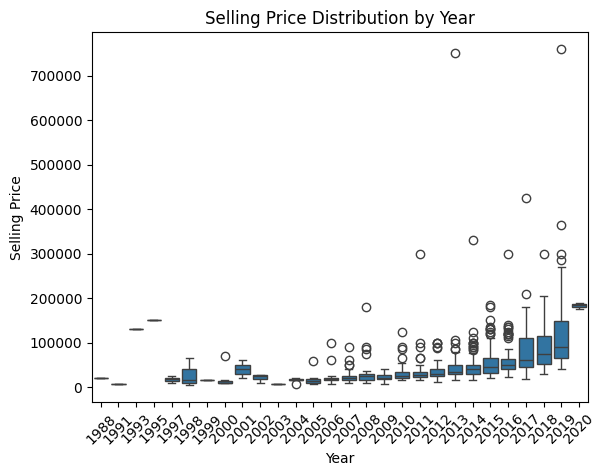

In [13]:
#Q12) Perform a bivariate analysis to visualize the relationship between year and selling_price.
sns.boxplot(x='year', y='selling_price', data=df)
plt.title('Selling Price Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.xticks(rotation=45)
plt.show()

In [14]:
#Q13)  What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?
import datetime

current_year = datetime.datetime.now().year
df['age'] = current_year - df['year']
avg_depreciation = df.groupby('age')['selling_price'].mean()
print(avg_depreciation)

age
5     183333.333333
6     119689.511628
7      87660.374046
8      78894.736842
9      58469.018692
10     56500.000000
11     48668.131868
12     51136.986301
13     35748.400000
14     35655.721311
15     31793.333333
16     22267.857143
17     34289.285714
18     24927.586207
19     23380.000000
20     16978.571429
21     15100.000000
22      8000.000000
23     20666.666667
24     40000.000000
25     20833.333333
26     15000.000000
27     28333.333333
28     17500.000000
30    150000.000000
32    130000.000000
34      6000.000000
37     20000.000000
Name: selling_price, dtype: float64


In [15]:
#Q14) Which bike names are priced significantly above the average price for their manufacturing year?
df['avg_price_by_year'] = df.groupby('year')['selling_price'].transform('mean')
df['price_diff'] = df['selling_price'] - df['avg_price_by_year']
significant_bikes = df[df['price_diff'] > df['price_diff'].std()]
print(significant_bikes[['name', 'year', 'selling_price', 'price_diff']])

                                     name  year  selling_price     price_diff
0               Royal Enfield Classic 350  2019         175000   55310.488372
2     Royal Enfield Classic Gunmetal Grey  2018         150000   62339.625954
7    Royal Enfield Bullet 350 [2007-2011]  2008         180000  145710.714286
13                          Yamaha YZF R3  2019         365000  245310.488372
18    Royal Enfield Classic Gunmetal Grey  2018         150000   62339.625954
..                                    ...   ...            ...            ...
967             Royal Enfield Thunder 350  2015         125000   68500.000000
972                         KTM 390 Duke   2016         115000   56530.981308
976             Royal Enfield Classic 350  2015         110000   53500.000000
981             Royal Enfield Thunder 350  2013         105000   53863.013699
985             Royal Enfield Classic 500  2011          90000   54344.278689

[112 rows x 4 columns]


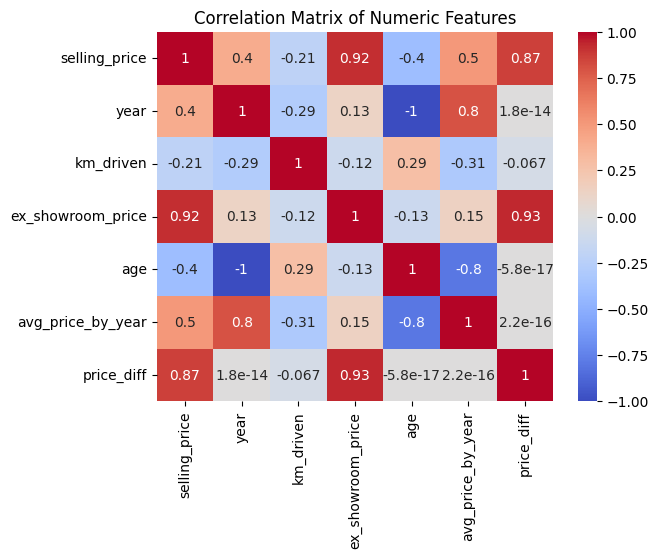

In [16]:
#Q15) Develop a correlation matrix for numeric columns and visualize it using a heatmap.
import numpy as np

numeric_cols = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_cols.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

##EDA - 2 Assignment

In [19]:
#Q1) What is the average selling price of cars for each dealer, and how does it compare across different dealers?
import pandas as pd

df = pd.read_csv('/content/Car Sale.csv')
avg_price_per_dealer = df.groupby('Dealer_Name')['Price ($)'].mean().sort_values(ascending=False)

print(avg_price_per_dealer)

Dealer_Name
U-Haul CO                                          28769.919006
Classic Chevy                                      28602.014446
Rabun Used Car Sales                               28527.536177
Iceberg Rentals                                    28522.958533
Enterprise Rent A Car                              28312.580800
Scrivener Performance Engineering                  28297.371589
Gartner Buick Hyundai Saab                         28247.621019
Saab-Belle Dodge                                   28190.139888
Capitol KIA                                        28189.703822
Race Car Help                                      28163.372706
Chrysler of Tri-Cities                             28123.091054
Star Enterprises Inc                               28113.055244
Suburban Ford                                      28112.206758
C & M Motors Inc                                   28111.755200
Tri-State Mack Inc                                 28095.562050
Pars Auto Sales             

In [20]:
#Q2) Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?

price_variation = df.groupby('Company')['Price ($)'].std().sort_values(ascending=False)
print(price_variation)

Company
Lincoln       19658.050211
Saab          19653.740089
Cadillac      19517.120220
Plymouth      19065.997338
Lexus         17852.923492
Buick         17142.232626
Mercury       16445.172195
Nissan        16214.264017
Saturn        15990.223671
Ford          15849.090227
Mercedes-B    15722.807459
Oldsmobile    15711.345857
Toyota        15367.131714
BMW           15065.578723
Pontiac       14348.963592
Infiniti      13696.332844
Chevrolet     13311.063223
Volvo         12933.790185
Subaru        12920.771620
Audi          12904.243867
Volkswagen    12527.124011
Mitsubishi    11671.343035
Chrysler      11583.286811
Dodge         11187.592085
Honda         11148.629062
Jaguar        10222.531533
Jeep           9459.834418
Acura          8183.046414
Porsche        5261.839206
Hyundai        3485.982649
Name: Price ($), dtype: float64


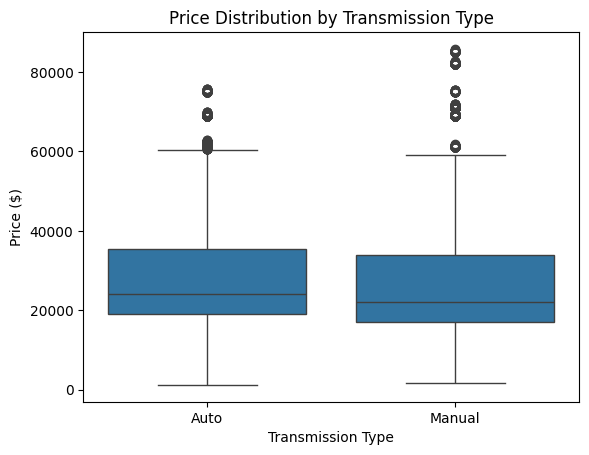

In [21]:
#Q3) What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='Transmission', y='Price ($)', data=df)
plt.title('Price Distribution by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Price ($)')
plt.show()

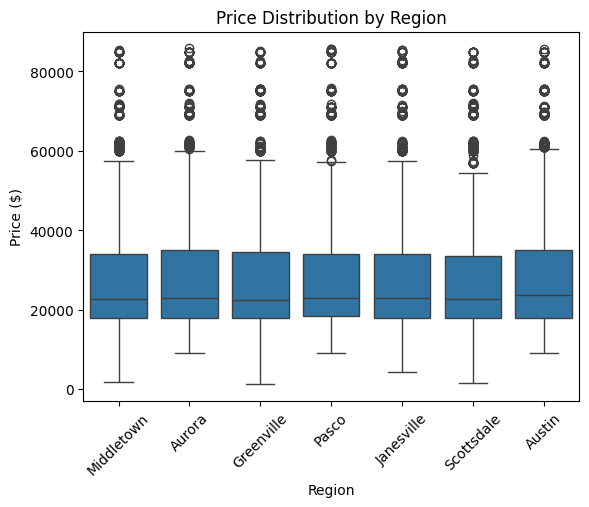

In [22]:
#Q4) What is the distribution of car prices across different regions?
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df)
plt.title('Price Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.show()

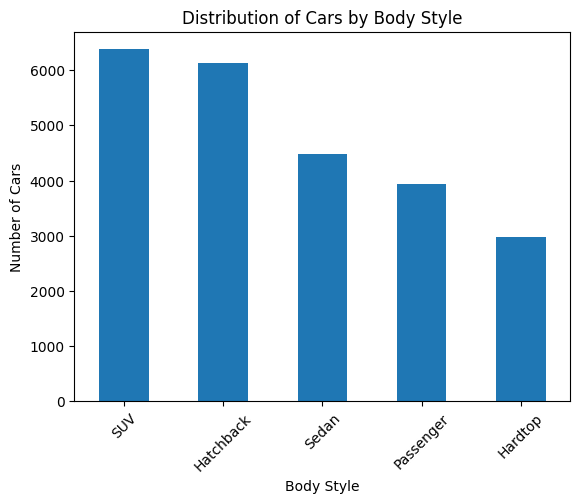

In [23]:
#Q5) What is the distribution of cars based on body styles?
body_style_counts = df['Body Style'].value_counts()

body_style_counts.plot(kind='bar')
plt.title('Distribution of Cars by Body Style')
plt.xlabel('Body Style')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)
plt.show()

In [24]:
#Q6) How does the average selling price of cars vary by customer gender and annual income?
gender_analysis = df.groupby('Gender').agg({'Price ($)': 'mean', 'Annual Income': 'mean'})
print(gender_analysis)

           Price ($)  Annual Income
Gender                             
Female  28277.265270  755973.021339
Male    28039.429407  851184.044207


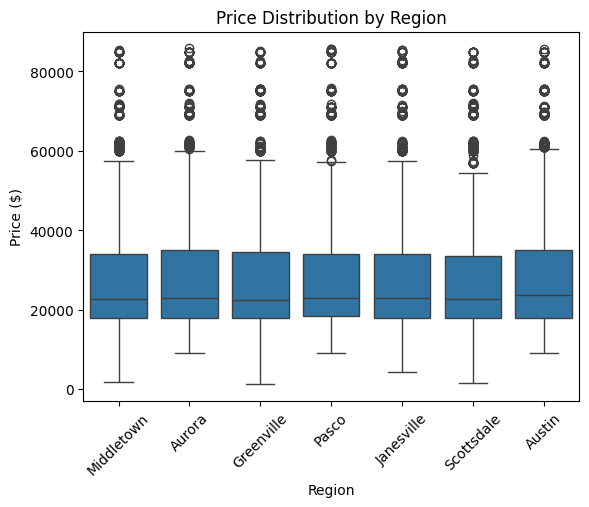

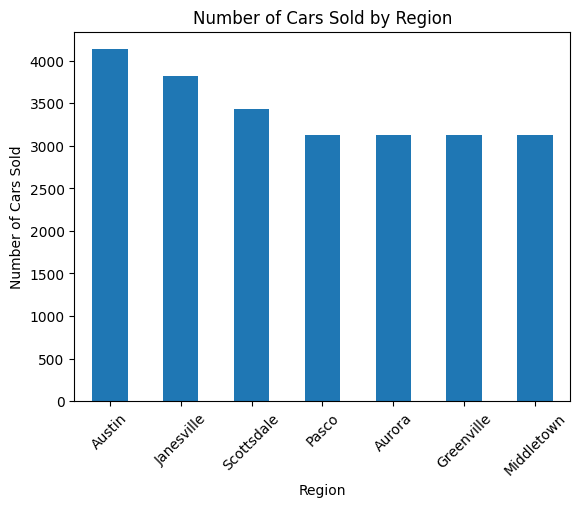

In [25]:
#Q7) What is the distribution of car prices by region, and how does the number of cars sold vary by region?
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df)
plt.title('Price Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.show()
region_sales_counts = df['Dealer_Region'].value_counts()

region_sales_counts.plot(kind='bar')
plt.title('Number of Cars Sold by Region')
plt.xlabel('Region')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45)
plt.show()

In [26]:
#Q8) How does the average car price differ between cars with different engine sizes?
engine_price_analysis = df.groupby('Engine')['Price ($)'].mean().sort_values(ascending=False)
print(engine_price_analysis)

Engine
DoubleÂ Overhead Camshaft    28248.525972
Overhead Camshaft            27914.710631
Name: Price ($), dtype: float64


In [27]:
#Q9) How do car prices vary based on the customer’s annual income bracket?
bins = [0, 30000, 60000, 90000, 120000, 150000, float('inf')]
labels = ['<30k', '30k-60k', '60k-90k', '90k-120k', '120k-150k', '>150k']
df['Income Bracket'] = pd.cut(df['Annual Income'], bins=bins, labels=labels, right=False)
income_price_analysis = df.groupby('Income Bracket')['Price ($)'].mean()
print(income_price_analysis)

Income Bracket
<30k         27884.297820
30k-60k               NaN
60k-90k      43000.000000
90k-120k     46001.000000
120k-150k    17500.000000
>150k        28149.089557
Name: Price ($), dtype: float64


<ipython-input-27-577fdb22daa1>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_price_analysis = df.groupby('Income Bracket')['Price ($)'].mean()


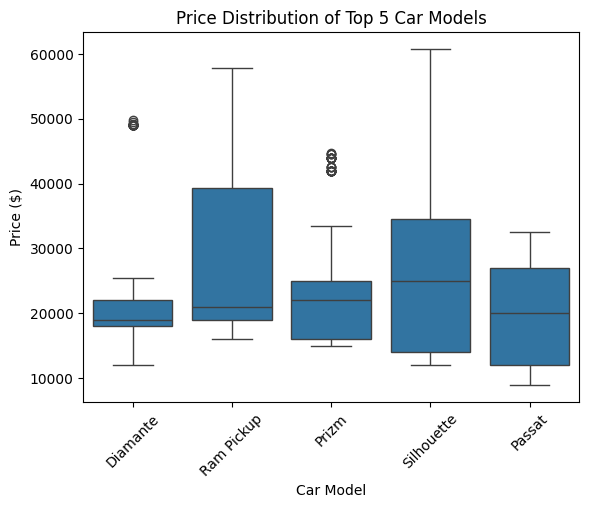

In [28]:
#Q10) What are the top 5 car models with the highest number of sales, and how does their price distribution look?
import seaborn as sns
import matplotlib.pyplot as plt
top_models = df['Model'].value_counts().head(5).index

top_models_df = df[df['Model'].isin(top_models)]
sns.boxplot(x='Model', y='Price ($)', data=top_models_df)
plt.title('Price Distribution of Top 5 Car Models')
plt.xlabel('Car Model')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.show()

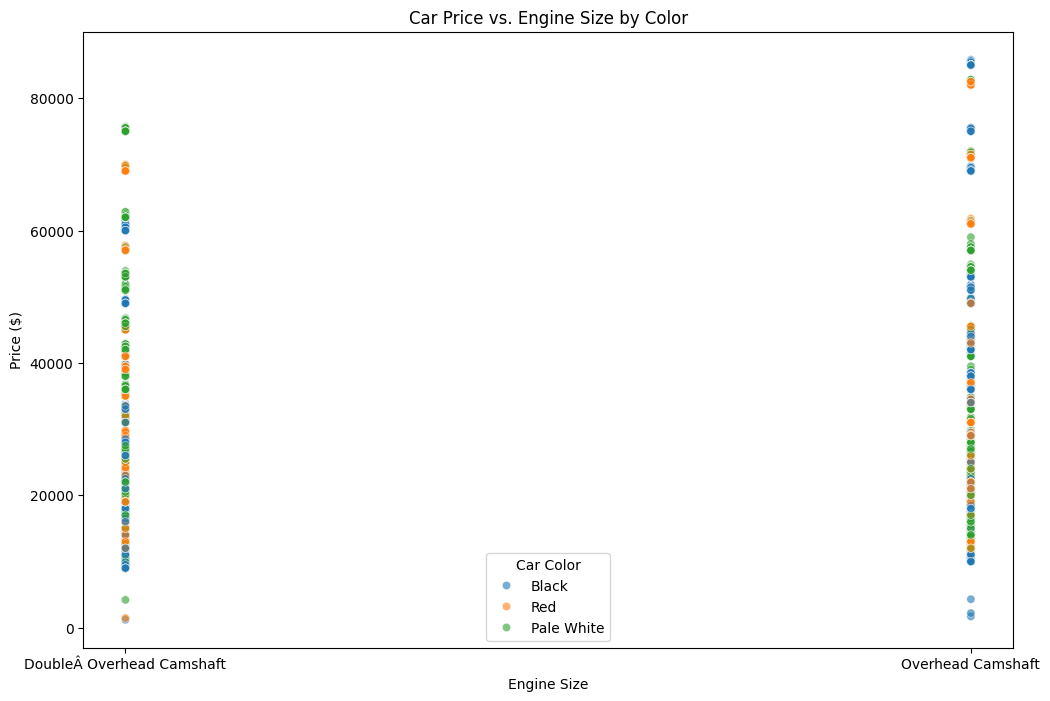

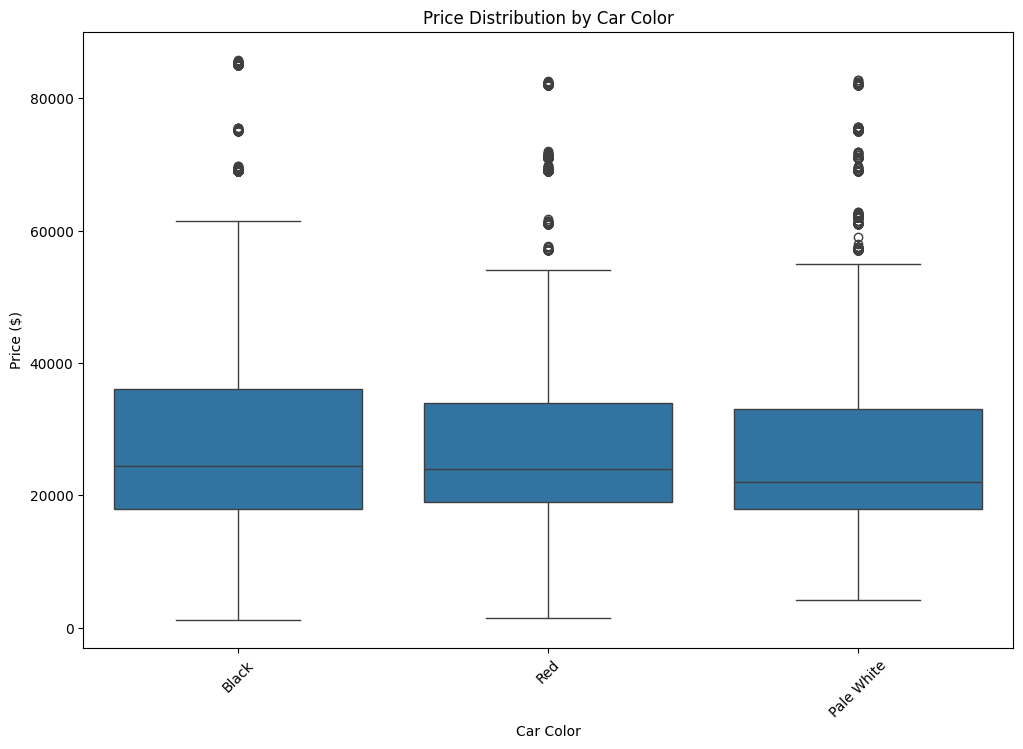

In [29]:
#Q11) How does car price vary with engine size across different car colors, and which colors have the highest price variation?
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Engine', y='Price ($)', hue='Color', data=df, alpha=0.6)
plt.title('Car Price vs. Engine Size by Color')
plt.xlabel('Engine Size')
plt.ylabel('Price ($)')
plt.legend(title='Car Color')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='Color', y='Price ($)', data=df)
plt.title('Price Distribution by Car Color')
plt.xlabel('Car Color')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.show()

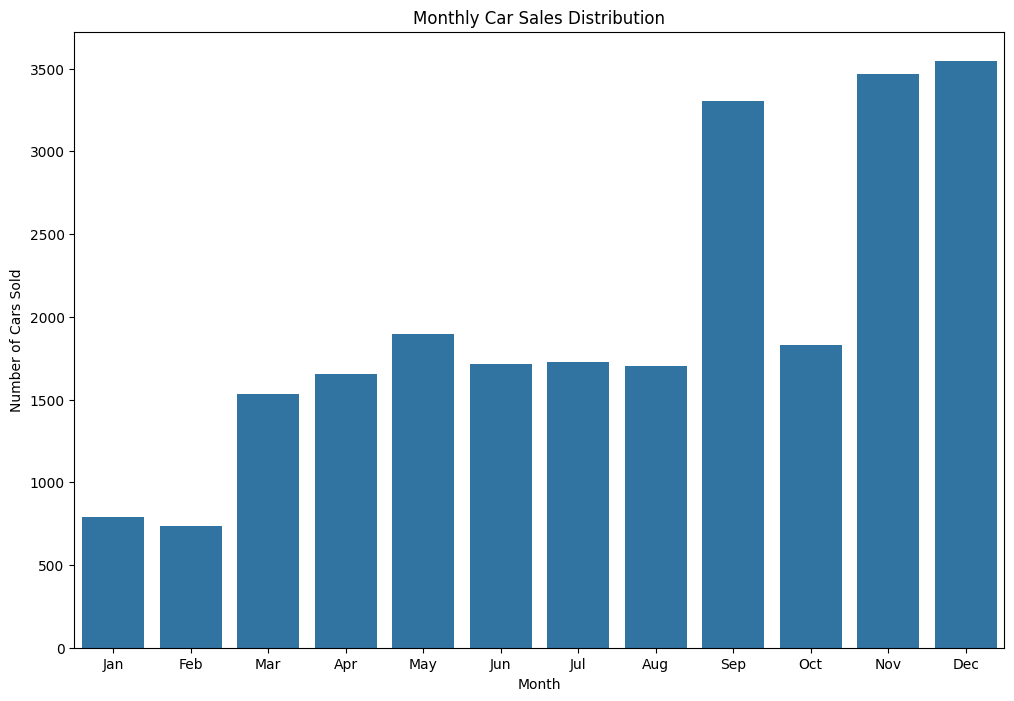

In [30]:
#Q12) Is there any seasonal trend in car sales based on the date of sale?
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

plt.figure(figsize=(12, 8))
sns.countplot(x='Month', data=df, order=range(1, 13))
plt.title('Monthly Car Sales Distribution')
plt.xlabel('Month')
plt.ylabel('Number of Cars Sold')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

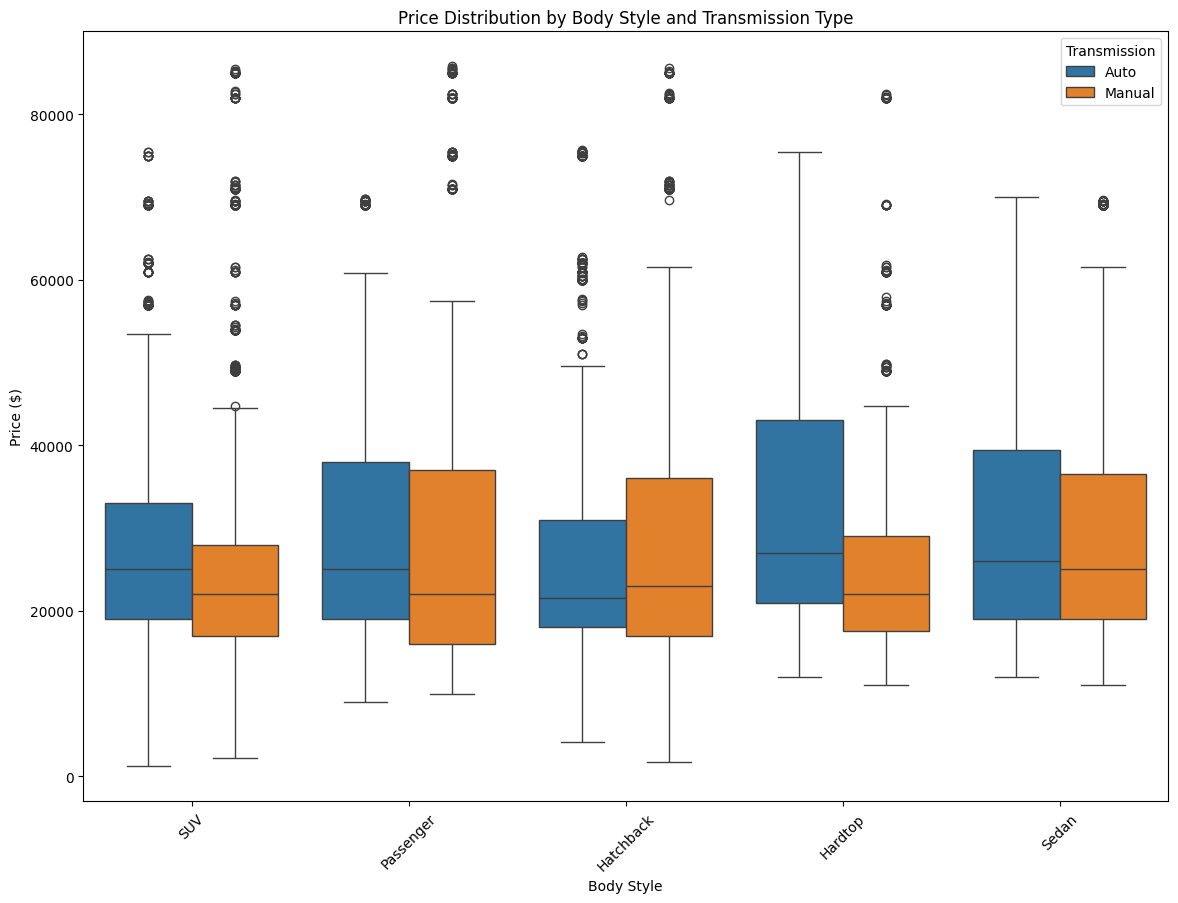

In [31]:
#Q13) How does the car price distribution change when considering different combinations of body style and transmission type?
plt.figure(figsize=(14, 10))
sns.boxplot(x='Body Style', y='Price ($)', hue='Transmission', data=df)
plt.title('Price Distribution by Body Style and Transmission Type')
plt.xlabel('Body Style')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.legend(title='Transmission')
plt.show()

               Price ($)  Engine  Annual Income
Price ($)       1.000000     NaN       0.012065
Engine               NaN     NaN            NaN
Annual Income   0.012065     NaN       1.000000


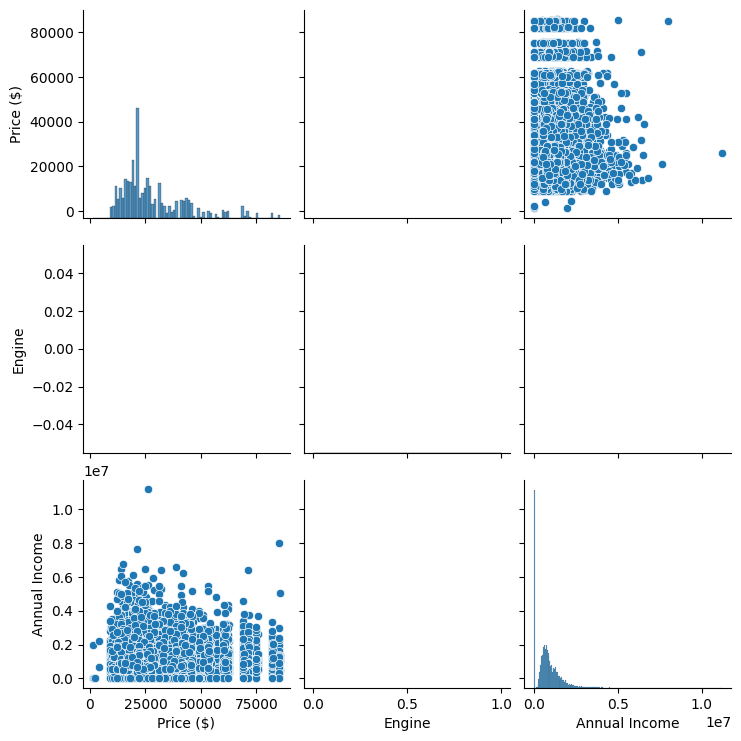

In [38]:
#Q14) What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?
df['Engine'] = pd.to_numeric(df['Engine'], errors='coerce')
correlation_matrix = df[['Price ($)', 'Engine', 'Annual Income']].corr()
print(correlation_matrix)
sns.pairplot(df[['Price ($)', 'Engine', 'Annual Income']])
plt.show()

In [40]:
#Q15) How does the average car price vary across different car models and engine types?
avg_price_model_engine = df.groupby(['Model', 'Engine'])['Price ($)'].mean().reset_index()
df['Engine'] = pd.to_numeric(df['Engine'], errors='coerce')
print(df[['Model', 'Engine', 'Price ($)']].isnull().sum())

pivot_table = avg_price_model_engine.pivot_table(index='Model', columns='Engine', values='Price ($)')
if pivot_table.empty:
    print("Warning: Pivot table is empty. Check data and grouping columns.")
else:
    plt.figure(figsize=(14, 10))
    sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='YlGnBu')
    plt.title('Average Car Price by Model and Engine Type')
    plt.xlabel('Engine Type')
    plt.ylabel('Car Model')
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.show()

Model            0
Engine       23906
Price ($)        0
dtype: int64


##EDA - 3 Assignment

In [43]:
#Q1) What is the average rating for each product category?
import pandas as pd
df = pd.read_csv('/content/amazon.csv')
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
avg_rating_per_category = df.groupby('category')['rating'].mean().reset_index()
avg_rating_per_category.rename(columns={'rating': 'average_rating'}, inplace=True)
print(avg_rating_per_category)

                                              category  average_rating
0    Car&Motorbike|CarAccessories|InteriorAccessori...        3.800000
1    Computers&Accessories|Accessories&Peripherals|...        4.150000
2    Computers&Accessories|Accessories&Peripherals|...        3.500000
3    Computers&Accessories|Accessories&Peripherals|...        3.600000
4    Computers&Accessories|Accessories&Peripherals|...        4.050000
..                                                 ...             ...
206  OfficeProducts|OfficePaperProducts|Paper|Stati...        4.250000
207  OfficeProducts|OfficePaperProducts|Paper|Stati...        4.150000
208  OfficeProducts|OfficePaperProducts|Paper|Stati...        4.300000
209  OfficeProducts|OfficePaperProducts|Paper|Stati...        4.133333
210  Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...        4.300000

[211 rows x 2 columns]


In [45]:
#Q2) What are the top rating_count products by category?
top_rated_products = df.loc[df.groupby('category')['rating_count'].idxmax()]
print(top_rated_products)

      product_id                                       product_name  \
1157  B0912WJ87V  Reffair AX30 [MAX] Portable Air Purifier for C...   
695   B097C564GC  rts [2 Pack] Mini USB C Type C Adapter Plug, T...   
906   B009LJ2BXA  Hp Wired On Ear Headphones With Mic With 3.5 M...   
772   B08HD7JQHX  HUMBLE Dynamic Lapel Collar Mic Voice Recordin...   
844   B08K9PX15C  Zebronics Zeb Wonderbar 10 USB Powered 2.0 Com...   
...          ...                                                ...   
616   B07KCMR8D6  Classmate Octane Neon- Blue Gel Pens(Pack of 5...   
993   B00S2SEV7K  Pilot Frixion Clicker Roller Pen (Blue), (9000...   
765   B00LM4W1N2             Parker Classic Gold Gold Trim Ball Pen   
850   B07SBGFDX9     Pentonic Multicolor Ball Point Pen, Pack of 10   
924   B00DJ5N9VK  Faber-Castell Connector Pen Set - Pack of 25 (...   

                                               category discounted_price  \
1157  Car&Motorbike|CarAccessories|InteriorAccessori...           ₹2,33

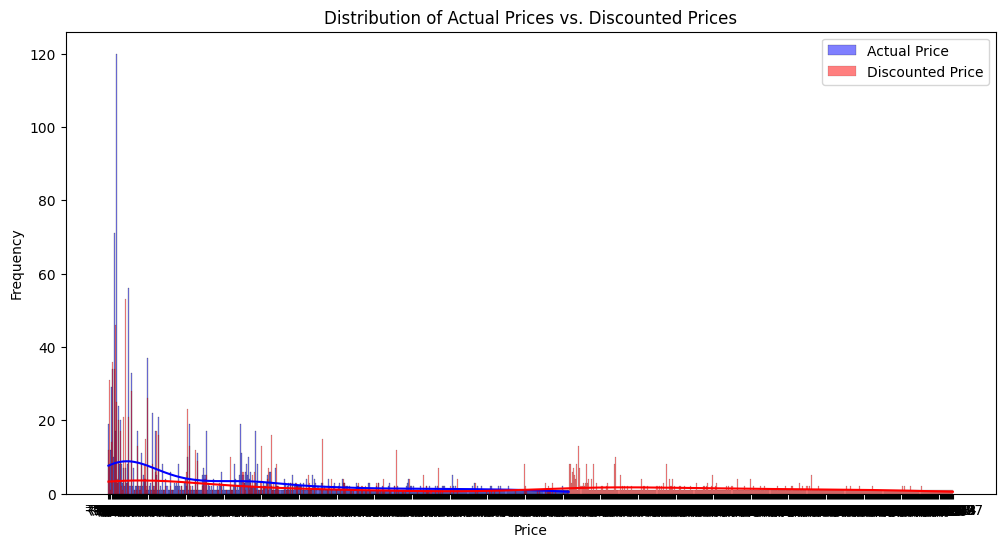

In [46]:
#Q3) What is the distribution of discounted prices vs. actual prices?
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.histplot(df['actual_price'], color='blue', label='Actual Price', kde=True)
sns.histplot(df['discounted_price'], color='red', label='Discounted Price', kde=True)
plt.title('Distribution of Actual Prices vs. Discounted Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()

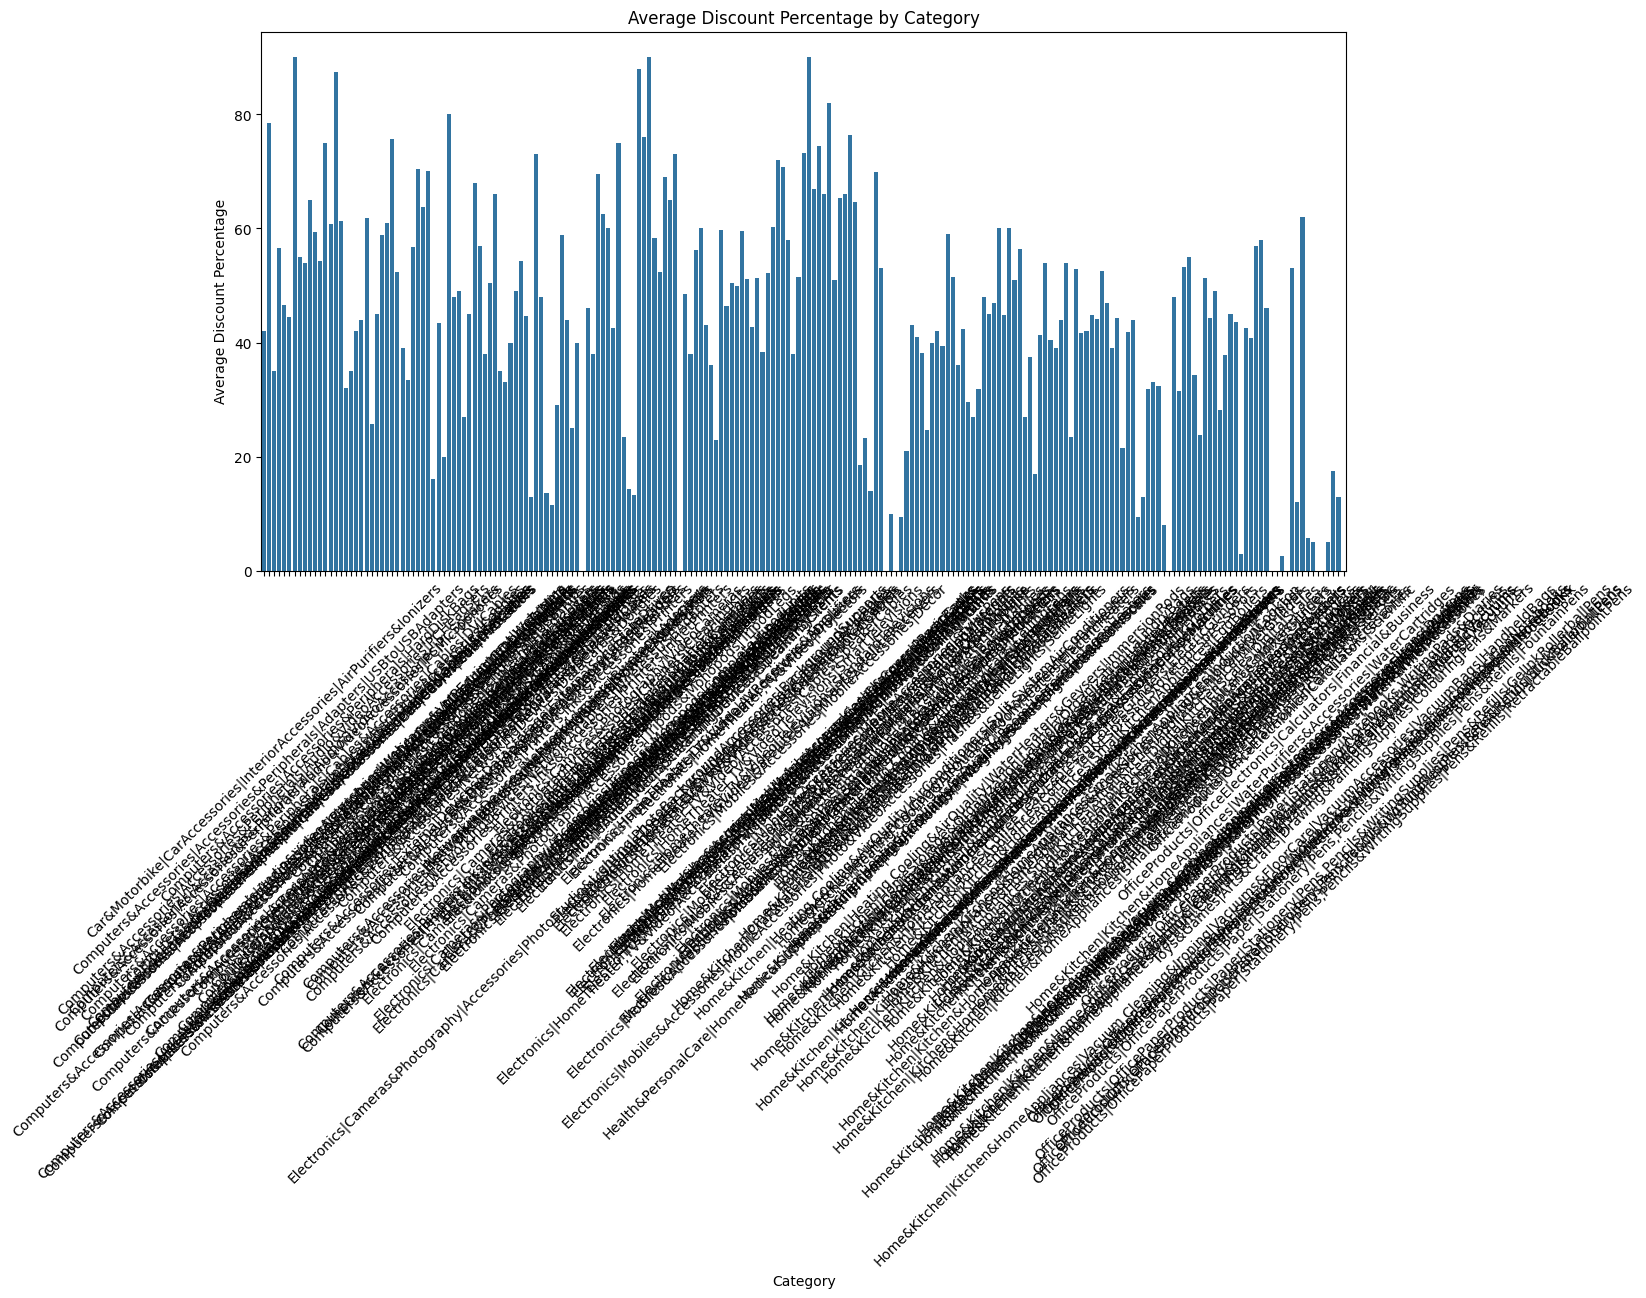

In [48]:
#Q4) How does the average discount percentage vary across categories?
df['discount_percentage'] = df['discount_percentage'].str.rstrip('%').astype(float)
average_discounts = df.groupby('category')['discount_percentage'].mean().reset_index()
average_discounts = average_discounts.rename(columns={'discount_percentage': 'average_discount_percentage'})
plt.figure(figsize=(14, 7))
sns.barplot(x='category', y='average_discount_percentage', data=average_discounts)
plt.title('Average Discount Percentage by Category')
plt.xlabel('Category')
plt.ylabel('Average Discount Percentage')
plt.xticks(rotation=45)
plt.show()

In [51]:
#Q5) What are the most popular product names?
product_popularity = df.groupby('product_name')['rating_count'].sum().reset_index()

product_popularity['rating_count'] = pd.to_numeric(product_popularity['rating_count'], errors='coerce')
product_popularity = product_popularity.sort_values(by='rating_count', ascending=False)
most_popular_products = product_popularity.head(10)
print(most_popular_products)

                                           product_name  rating_count
325   Duracell USB Lightning Apple Certified (Mfi) B...   815815815.0
121   Ambrane 2 in 1 Type-C & Micro USB Cable with 6...   602602602.0
324   Duracell USB C To Lightning Apple Certified (M...   184184184.0
1237  Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...      974974.0
1179  Wecool Unbreakable 3 in 1 Charging Cable with ...      656656.0
1022  Sounce 65W OnePlus Dash Warp Charge Cable, 6.5...      576575.0
947   SWAPKART Fast Charging Cable and Data Sync USB...      536536.0
322   Duracell Type C To Type C 5A (100W) Braided Sy...      462462.0
832   Portronics Konnect L 20W PD Quick Charge Type-...      450450.0
985   Samsung Original Type C to C Cable - 3.28 Feet...      355355.0


In [52]:
#Q6) What are the most popular product keywords?
from collections import Counter
import re
def tokenize(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove punctuation
    tokens = text.lower().split()
    return tokens
df['tokens'] = df['product_name'].apply(tokenize)
all_tokens = [token for sublist in df['tokens'] for token in sublist]
keyword_counts = Counter(all_tokens)

keyword_df = pd.DataFrame(keyword_counts.items(), columns=['keyword', 'count'])
keyword_df = keyword_df.sort_values(by='count', ascending=False)
most_popular_keywords = keyword_df.head(10)
print(most_popular_keywords)

     keyword  count
66      with    752
13       for    674
51     black    468
11     cable    401
3        usb    390
8        and    330
7   charging    246
4         to    218
6       fast    211
38         c    188


In [54]:
#Q7) What are the most popular product reviews?
reviews_with_popularity = df[['review_content', 'rating_count']].drop_duplicates()
reviews_with_popularity = reviews_with_popularity.sort_values(by='rating_count', ascending=False)
most_popular_reviews = reviews_with_popularity.head(10)
print(most_popular_reviews)

                                         review_content rating_count
1279  Does the job well,doesn't work on sand. though...          992
750   Nive,very good batteries received,Like,Good pr...          989
977   For those looking for a genuine review & a bri...       98,250
1059  Bottle quality is not good.,Best for hot water...          976
32    Not charging as fast as I'd have expected. May...          974
536   ----------------------------------------------...       97,175
918   ----------------------------------------------...       97,174
1301  ,Good product.Initially a duplicate product wa...           97
1332  In this price worth to go for,Yet to use it bu...           97
1165  I bought it for ₹79. Don't think that because ...           97


In [56]:
#Q8) What is the correlation between discounted_price and rating?
df['discounted_price'] = df['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)
correlation = df['discounted_price'].corr(df['rating'])
print(f'Correlation between discounted price and rating: {correlation}')

Correlation between discounted price and rating: 0.12033741712288548


In [59]:
#Q9) What are the Top 5 categories based on the highest rating?
import pandas as pd
df = pd.read_csv('/content/amazon.csv')
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
avg_ratings = df.groupby('category')['rating'].mean().reset_index()
top_5_categories = avg_ratings.sort_values(by='rating', ascending=False).head(5)
print(top_5_categories)

                                             category  rating
57                      Computers&Accessories|Tablets     4.6
48  Computers&Accessories|NetworkingDevices|Networ...     4.5
62   Electronics|Cameras&Photography|Accessories|Film     4.5
38            Computers&Accessories|Components|Memory     4.5
81  Electronics|HomeAudio|MediaStreamingDevices|St...     4.5


Products with high discount but low ratings:
                                            product_name  \
545   SHREENOVA ID116 Plus Bluetooth Fitness Smart W...   
1243  Personal Size Blender, Portable Blender, Batte...   
1286  MR. BRAND Portable USB Juicer Electric USB Jui...   
1449  IONIX Tap filter Multilayer | Activated Carbon...   

                                               category  discount_percentage  \
545         Electronics|WearableTechnology|SmartWatches                 86.0   
1243  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...                 55.0   
1286  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...                 77.0   
1449  Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...                 72.0   

      rating  
545      2.8  
1243     2.3  
1286     2.8  
1449     2.9  

Popular products (many ratings) but low customer satisfaction:
                                            product_name  rating_count  rating
82    SKYWALL 81.28 cm (32 inches) HD R

<ipython-input-62-ae7d6405850c>:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


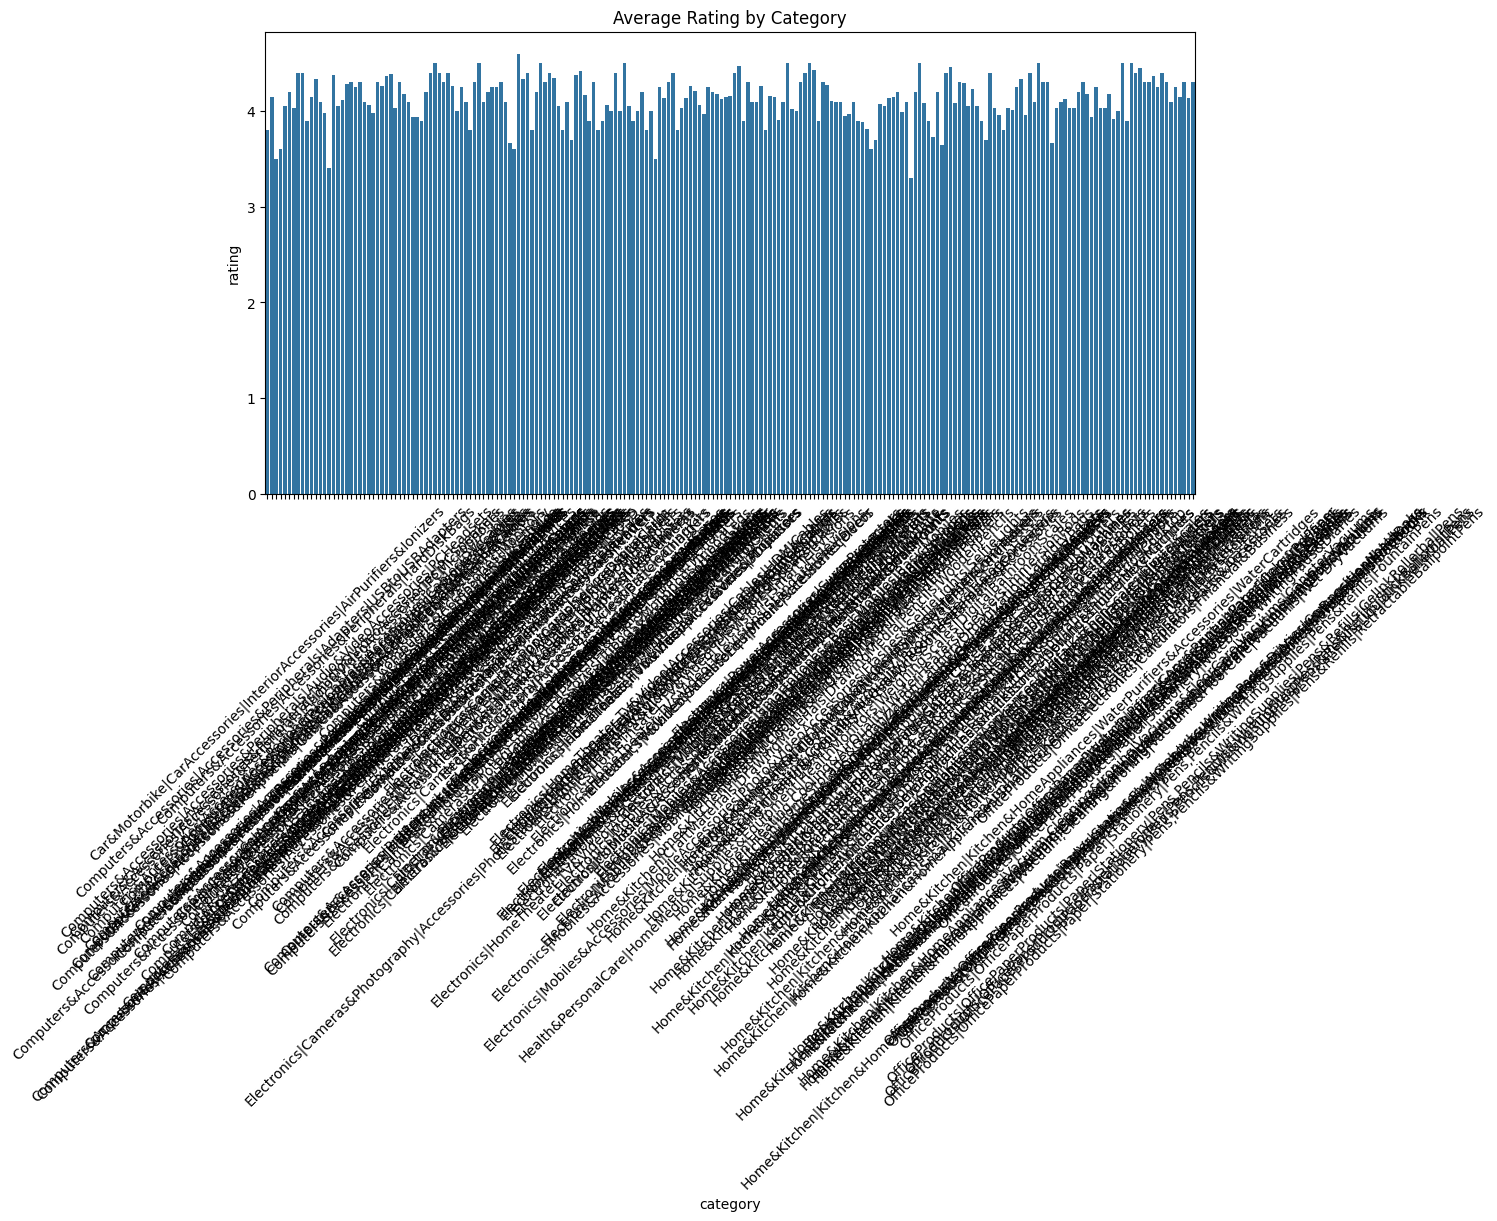


Products with very short descriptions:
                                            product_name  description_length
132   Saifsmart Outlet Wall Mount Hanger Holder for ...                   9
198   Belkin Apple Certified Lightning to USB Charge...                  24
217   Posh 1.5 Meter High Speed Gold Plated HDMI Mal...                  24
424   MI Xiaomi 22.5W Fast USB Type C Charger Combo ...                  29
666   Zodo 8. 5 inch LCD E-Writer Electronic Writing...                  26
889   Portronics Key2 Combo Multimedia USB Wireless ...                  27
1182  Coway Professional Air Purifier for Home, Long...                   5
1275  Multifunctional 2 in 1 Electric Egg Boiling St...                  14
1344  Longway Blaze 2 Rod Quartz Room Heater (White,...                  21
1382  Lifelong LLMG74 750 Watt Mixer Grinder with 3 ...                  16
1424         KENT POWP-Sediment Filter 10'' Thread WCAP                  28
1440         Eco Crystal J 5 inch Cartridge (Pa

In [62]:
#Q10) Identify any potential areas for improvement or optimization based on the data analysis.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 1. Check for categories with high discounts but low ratings
# No need to replace '%' and convert to float again if already done in previous cells
# df['discount_percentage'] = df['discount_percentage'].str.replace('%', '').astype(float)
high_discount_low_rating = df[(df['discount_percentage'] > 50) & (df['rating'] < 3)]
print("Products with high discount but low ratings:\n", high_discount_low_rating[['product_name', 'category', 'discount_percentage', 'rating']])
# 2. Check products with high rating_count but low ratings (need quality improvements)
# Convert 'rating_count' to numeric, handling errors
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')
high_review_low_rating = df[(df['rating_count'] > 100) & (df['rating'] < 3.5)]
print("\nPopular products (many ratings) but low customer satisfaction:\n", high_review_low_rating[['product_name', 'rating_count', 'rating']])
# 3. Category-wise average rating and review count
category_stats = df.groupby('category').agg({'rating': 'mean', 'rating_count': 'sum', 'discount_percentage': 'mean'}).reset_index()
print("\nCategory-wise Summary (Average Rating, Review Count, Avg. Discount):\n", category_stats)
# 4. Visualization of category performance
plt.figure(figsize=(12, 6))
sns.barplot(x='category', y='rating', data=category_stats)
plt.xticks(rotation=45)
plt.title('Average Rating by Category')
plt.tight_layout()
plt.show()
# 5. Products with missing or poor descriptions (optional if about_product column is messy)
df['about_product'] = df['about_product'].fillna('')
df['description_length'] = df['about_product'].apply(len)
short_descriptions = df[df['description_length'] < 30]
print("\nProducts with very short descriptions:\n", short_descriptions[['product_name', 'description_length']])

##EDA - 4 Assignment

In [64]:
#Q1) Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful.
import pandas as pd
df = pd.read_csv("/content/spotify.csv")

print("Null values:\n", df.isnull().sum())

# Drop rows with null values
df.dropna(inplace=True)

print("\nDuplicate rows:", df.duplicated().sum())

df.drop_duplicates(inplace=True)

# Final shape
print("\nShape after cleaning:", df.shape)

Null values:
 Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

Duplicate rows: 27

Shape after cleaning: (413, 5)


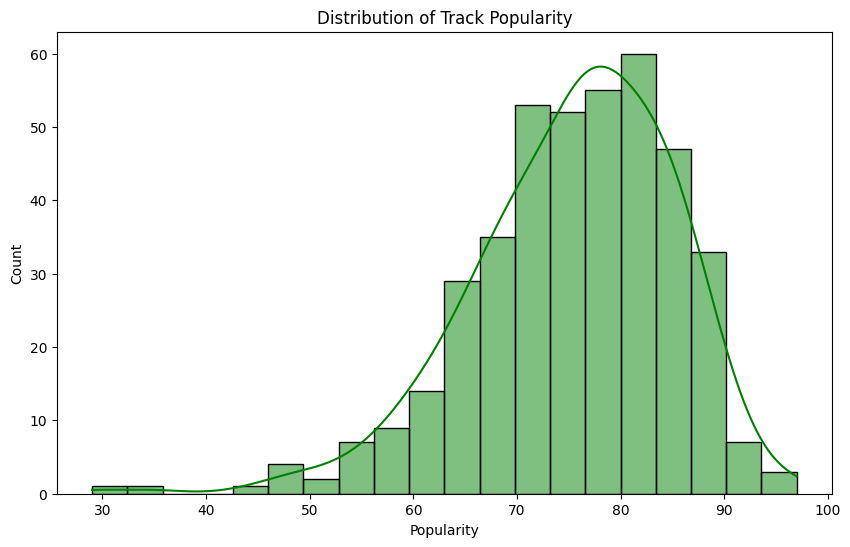

In [65]:
#Q2) What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram?
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.histplot(df['Popularity'], bins=20, kde=True, color='green')
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.show()

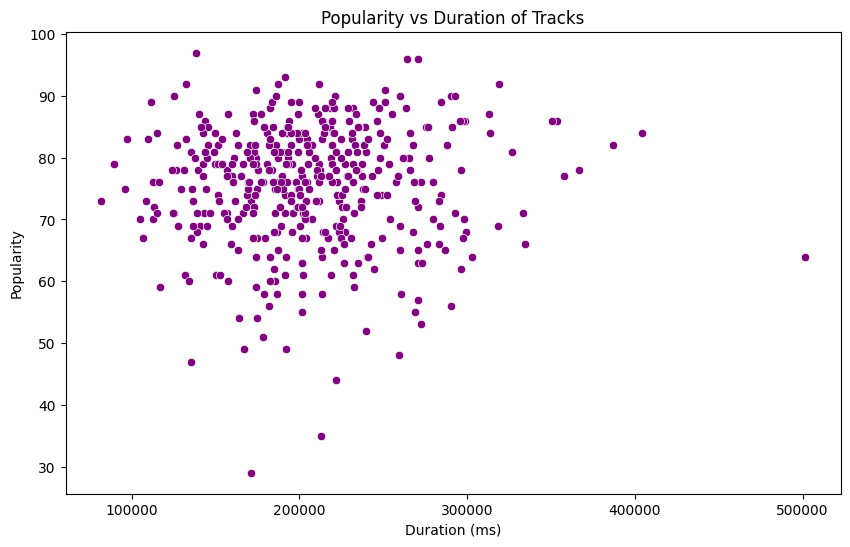

In [66]:
#Q3) Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.
plt.figure(figsize=(10,6))
sns.scatterplot(x='Duration (ms)', y='Popularity', data=df, color='purple')
plt.title('Popularity vs Duration of Tracks')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.show()

<ipython-input-67-dd093e0b6112>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Artist', data=df[df['Artist'].isin(top_artists.index)], order=top_artists.index, palette='viridis')


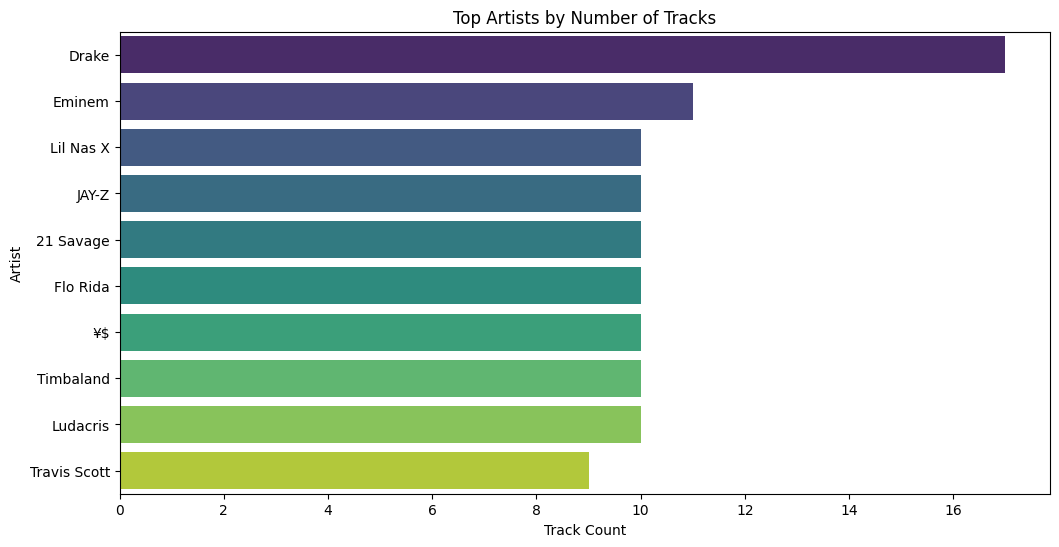

In [67]:
#Q4) Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot.
plt.figure(figsize=(12,6))
top_artists = df['Artist'].value_counts().head(10)
sns.countplot(y='Artist', data=df[df['Artist'].isin(top_artists.index)], order=top_artists.index, palette='viridis')
plt.title('Top Artists by Number of Tracks')
plt.xlabel('Track Count')
plt.ylabel('Artist')
plt.show()

In [68]:
#Q5) What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.
least_popular = df.sort_values(by='Popularity').head(5)[['Artist', 'Track Name', 'Popularity']]
print(least_popular)

             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


In [69]:
#Q6) Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist.
top_5_artists = df['Artist'].value_counts().head(5).index

avg_popularity = df[df['Artist'].isin(top_5_artists)].groupby('Artist')['Popularity'].mean().sort_values(ascending=False)
print(avg_popularity)

Artist
21 Savage    83.800000
Eminem       83.636364
Drake        82.882353
JAY-Z        77.900000
Lil Nas X    75.900000
Name: Popularity, dtype: float64


In [70]:
#Q7) For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.
most_popular_tracks = df[df['Artist'].isin(top_5_artists)]
top_tracks = most_popular_tracks.sort_values('Popularity', ascending=False).drop_duplicates('Artist')[['Artist', 'Track Name', 'Popularity']]
print(top_tracks)

        Artist                               Track Name  Popularity
70   21 Savage                                   redrum          96
0        Drake  Rich Baby Daddy (feat. Sexyy Red & SZA)          92
80      Eminem                               Without Me          90
100      JAY-Z                          Ni**as In Paris          86
312  Lil Nas X                        THATS WHAT I WANT          81


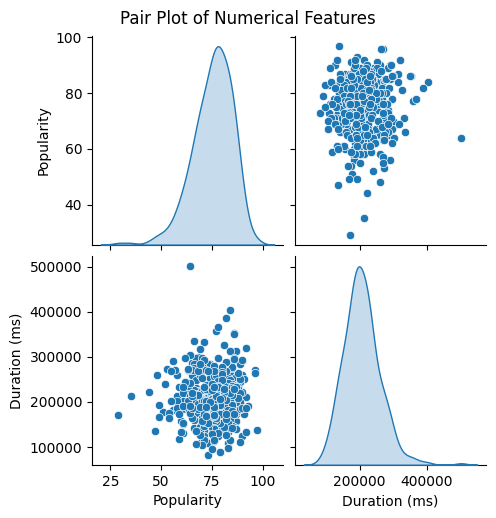

In [71]:
#Q8) Visualize relationships between multiple numerical variables simultaneously using a pair plot.
sns.pairplot(df[['Popularity', 'Duration (ms)']], diag_kind='kde')
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

<ipython-input-72-bf1fe9619526>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['Artist'].isin(top_artists.index)], x='Artist', y='Duration (ms)', palette='Set3')


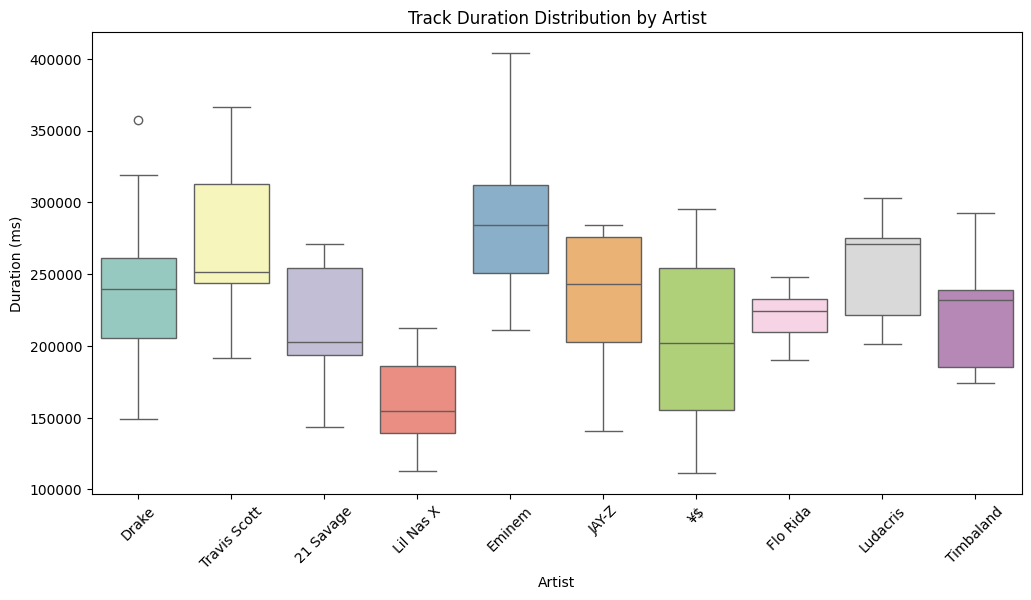

In [72]:
#Q9) Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot.
plt.figure(figsize=(12,6))
sns.boxplot(data=df[df['Artist'].isin(top_artists.index)], x='Artist', y='Duration (ms)', palette='Set3')
plt.title('Track Duration Distribution by Artist')
plt.xticks(rotation=45)
plt.show()

<ipython-input-73-0e6a9ff4c355>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df[df['Artist'].isin(top_artists.index)], x='Artist', y='Popularity', palette='pastel')


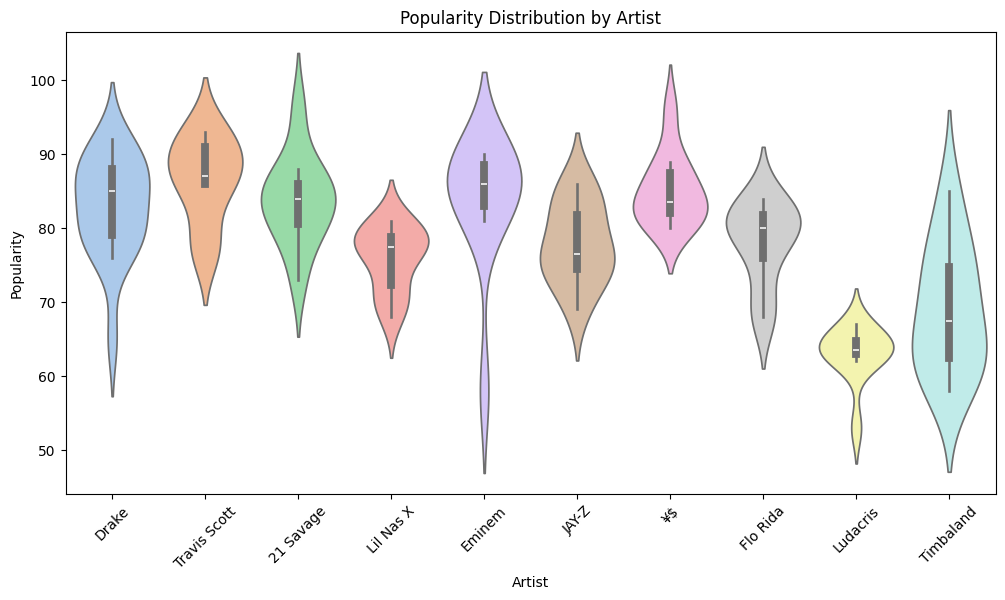

In [73]:
#Q10) How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.
plt.figure(figsize=(12,6))
sns.violinplot(data=df[df['Artist'].isin(top_artists.index)], x='Artist', y='Popularity', palette='pastel')
plt.title('Popularity Distribution by Artist')
plt.xticks(rotation=45)
plt.show()